In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# スクレイピング
def get_winners(year, area):
    url = f"https://cvg.nikkan.co.jp/{area}_backnumber/{year}"
    try:
      response = requests.get(url)
      response.raise_for_status()  # Check if the request was successful
    except:
      return None
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table with section_id="taikai_result"
    table = soup.find('section', id='taikai_result')
    if table is None:
        return None  # No table found for this year

    # Parse the table
    data = []
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if len(cols) > 1:
            data.append(cols)

    return data

# 2004～2023年の各開催地におけるデータを取得
all_data = []
years = range(2004, 2023 + 1)
for year in years:
  for area in ['hokkaido', 'tohoku', 'tokyo', 'chubu', 'osaka', 'chugoku', 'shikoku', 'kyushu']:
      winners = get_winners(year, area)
      if winners:
          for winner in winners:
              all_data.append([year] + winner)


In [ ]:
import csv
import os

def extract_service_names(data):
    service_names = set()
    for row in data:
        if len(row) == 3:
            service_names.add((row[0], row[2]))
        elif len(row) == 5:
            service_names.add((row[0], row[4]))

    service_names = list(service_names)
    data = pd.DataFrame(columns=['year', 'description'])
    for i in range(len(service_names)):
      if service_names[i][1] == 'プラン名':
        pass
      else:
        data.loc[i] = [service_names[i][0], service_names[i][1]]
    return data

data = extract_service_names(all_data)


In [ ]:
# 必要なライブラリをインストール
!pip install numpy nltk scikit-learn matplotlib seaborn

import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# nltkデータのダウンロード
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install janome
from janome.tokenizer import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 49.3 MB/s eta 0:00:00


Topic #0:
予防 装置 技術 ネットワーク ロボット 教育 記憶
Topic #1:
支援 広告 学生 作成 sns 高齢 学習
Topic #2:
健康 アプリ 装置 提案 社会 促進 ペット
Topic #3:
次世代 提案 応募 デバイス 技術 広告 地域
Topic #4:
携帯 電話 地域 技術 自動 づくり 配信
Topic #5:
情報 農業 地域 管理 発電 マッチング 防止
Topic #6:
提案 支援 サイト 機能 実現 フォン スマート
Topic #7:
観光 サイト web 提案 地域 検索 情報
Topic #8:
地域 支援 体験 活性 文化 伝統 アプリケーション
Topic #9:
学習 女性 食品 サイト ブランド 消費 カフェ



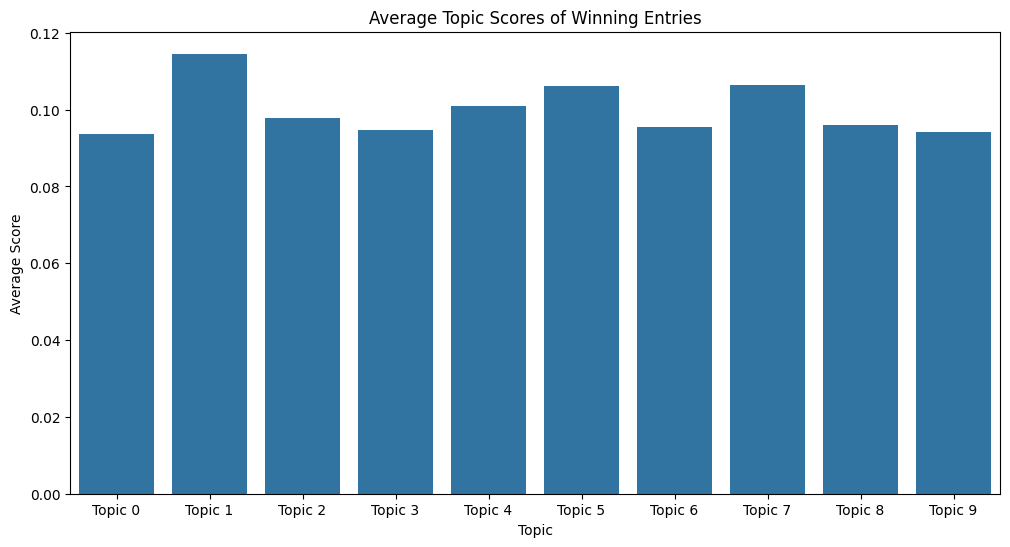

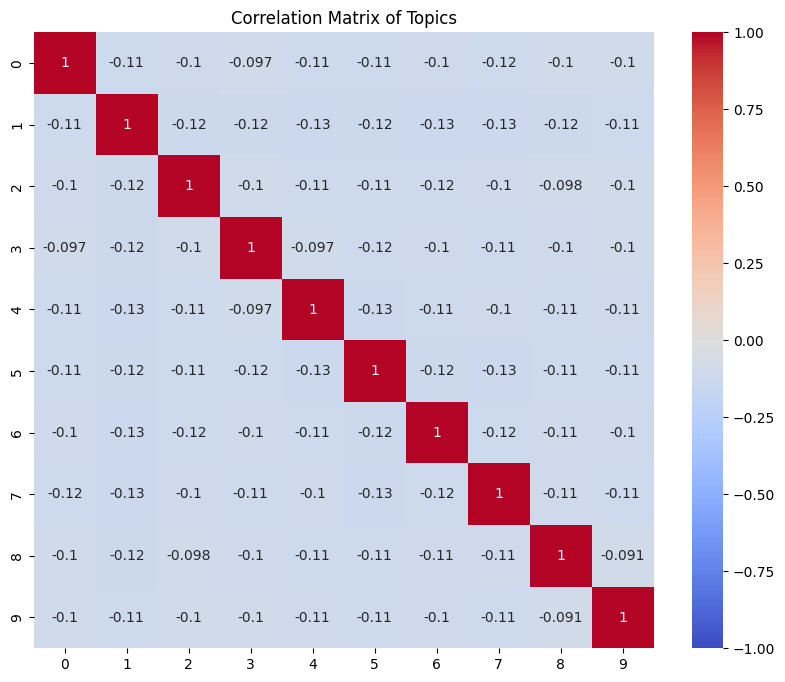

In [ ]:
prefecture_names = {
    '北海道', '青森', '岩手', '宮城', '秋田', '山形', '福島',
    '茨城', '栃木', '群馬', '埼玉', '千葉', '東京', '神奈川',
    '新潟', '富山', '石川', '福井', '山梨', '長野', '岐阜',
    '静岡', '愛知', '三重', '滋賀', '京都', '大阪', '兵庫',
    '奈良', '和歌山', '鳥取', '島根', '岡山', '広島', '山口',
    '徳島', '香川', '愛媛', '高知', '福岡', '佐賀', '長崎',
    '熊本', '大分', '宮崎', '鹿児島', '沖縄'
}
prefecture_universities = {name + '大学' for name in prefecture_names}

# NGワードの設定
ng_words = {
    'project', '販売', 'com', 'baby', 'サービス', '企業', 'システム', '事業',
    'プロジェクト', 'ビジネス', '向け', '使う', '用いる', 'モノ', '活用',
    'みんな', 'プラットフォーム', '提供', '開発', '導入', '利用', '顧客',
    '顧問', '相談', 'お客様', 'ユーザー', 'クライアント', '取引先', 'サポート',
    'メンバー', '製品', '商品', 'マーケティング', '戦略', 'コンテンツ', '分野',
    '産業', '業界', '企業向け', 'ニーズ', '対象', '会社', 'チーム', 'プラン',
    '目指す', 'カタチ', '大学', 'my', 'de', '感覚', 'テーマ', 'スマートフォン',
    '新しい', 'プログラム', '創る', '応援', '新規', '日本', '大学院', '作る',
    '新た'
}.union(prefecture_names).union(prefecture_universities)


# 日本語のストップワードを設定
stop_words_set = ng_words.union({
    'から', 'における', 'による', 'ため', 'の', 'に', 'を', 'で', 'と',
    'できる', 'は', 'が', 'て', 'い', 'な', 'も', 'する', 'ない', 'ある',
    'これ', 'それ', 'あれ', 'この', 'その', 'あの', 'ここ', 'そこ', 'あそこ',
    'ところ', 'どこ', 'どれ', 'だれ', '何', 'どう', 'なに', 'いつ', 'いう',
    'および', 'おる', 'くださる', 'さらに', 'しかし', 'そのため', 'そして',
    'ただし', 'なお', 'また', 'または', 'もしくは', 'あるいは', 'および',
    'かつ', 'ならびに', 'ただし', 'ただ', 'および', '一方', 'という', 'でも',
    'たい'
})


# ストップワードセットをリストに変換
stop_words_list = list(stop_words_set)

# 前処理
def preprocess_text(text):
    # 小文字化（日本語には影響しないが一応統一のため）
    text = text.lower()
    # トークン化
    t = Tokenizer()
    words = [token.base_form for token in t.tokenize(text) if token.base_form not in stop_words_list and token.surface not in stop_words_list]
    return ' '.join(words)

# 各作品の説明を前処理
data['processed_description'] = data['description'].apply(preprocess_text)

# 特徴抽出
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=stop_words_list)
X = vectorizer.fit_transform(data['processed_description'])

# 年に基づく重みの計算
start_year = 2023
data['weight'] = data['year'].apply(lambda y: 1 + (y - start_year) * 0.05)  # 年が最新であるほど重みが大きくなる


# LDAによるトピックモデルの生成
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# トピックごとのキーワードを表示
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, vectorizer.get_feature_names_out(), 7)

# 各作品のトピック分布を取得
topic_distribution = lda.transform(X)

# トピック分布をリストに変換
topic_list = topic_distribution.tolist()

# 統計分析
# トピックごとの平均スコアをプロット
topic_means = np.mean(topic_distribution, axis=0)
plt.figure(figsize=(12, 6))
sns.barplot(x=[f'Topic {i}' for i in range(len(topic_means))], y=topic_means)
plt.xlabel('Topic')
plt.ylabel('Average Score')
plt.title('Average Topic Scores of Winning Entries')
plt.show()

# トピックごとの特徴を分析
correlation_matrix = np.corrcoef(topic_distribution.T)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Topics')
plt.show()


In [ ]:
from PIL import Image
from wordcloud import WordCloud

# ワードクラウドを生成して表示
def plot_word_cloud(lda, feature_names, n_top_words):
    font_path = './NotoSansJP-VariableFont_wght.ttf'  # 日本語フォントのパスを指定
    images = []

    for topic_idx, topic in enumerate(lda.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', font_path=font_path).generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic #{topic_idx}')

        # 画像として保存
        image_path = f'wordcloud_topic_{topic_idx}.png'
        plt.savefig(image_path)
        plt.close()

        # 画像を読み込んでリストに追加
        images.append(Image.open(image_path))

    # 画像を連結
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    combined_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        combined_image.paste(im, (x_offset, 0))
        x_offset += im.width

    combined_image.save('combined_wordcloud.png')
    print("Combined word cloud saved as 'combined_wordcloud.png'")

plot_word_cloud(lda, vectorizer.get_feature_names_out(), 10)

Combined word cloud saved as 'combined_wordcloud.png'
